In [1]:
name = "Nathan Vermeiren"

1


## Vraag1: Analytische oplossing van de inwendige gasdruk

#### Scheiden van variabelen

Alle p-termen aan één kant, t-termen aan de andere kant:

dp / (pe - p) = k * dt

---

#### Integreren

Integreer beide zijden:

∫ (1 / (pe - p)) dp = ∫ k dt

Substitutie: u = pe - p en dus du = -dp

-∫ (1 / u) du = k * t + C  
ln|pe - p| = -k * t + C'

---

#### Oplossen voor p(t)

pe - p = C * exp(-k * t)  
=> p(t) = pe - C * exp(-k * t)

Gebruik beginvoorwaarde p(0) = p0:

p0 = pe - C => C = pe - p0

**Oplossing:**

p(t) = pe + (p0 - pe) * exp(-k * t)

---



## Vraag 2: Halveringstijd en uitdrukking in termen van τ

We weten uit vraag 1:

p(t) = pe + (p0 - pe) * exp(-k * t)

We definieren de halveringstijd τ als de tijd dat het verschil met de omgevingsdruk halveert:

p(τ) - pe = 1/2 * (p0 - pe)

Invullen van de oplossing:

p(τ) - pe = (p0 - pe) * exp(-k * τ) = 1/2 * (p0 - pe)

=> exp(-k * τ) = 1/2  
=> k = ln(2) / τ

**We zien dus**

1. De halveringstijd τ hangt alleen af van het weefseltype (via k) en is onafhankelijk van p0 of pe.
2. De oplossing kan nu in termen van τ geschreven worden:

p(t) = pe + (p0 - pe) * 2^(-t / τ)


## Vraag 3: Maximale tijd in vereenvoudigde situatie

#### Wat weten we al?

- M => 2.5 druk voorwaarde
- p0 => 1 Bar (aan het oppervlak)
- pe => 1 + d/10 (per 10m stijgt de druk met 1 bar)
- T => de tijd die de duiker op die diepte blijft
- τ => halveringstijd voor type weefsel 
- p(t) = pe + (p0 - pe) * 2^(-t / τ) => de formule voor de inwendige druk te meten
- p(t) mag niet groter zijn dan 1/M (met M = 1/2.5, en 1 bar aan het oppervlak)

#### Wat zoeken we?

p(t) < 1/M => p(T_max) = 1/M
We zoeken dus de maximale tijd die men mag doorbrengen op gegeven diepte voor gegeven spierfweefsel

#### berekeningen

- p(T_max) = 1/M, gebruik formule voor p(T_max)
- <=> pe + (p0 - pe)2^(-T_max / τ) = 1/M, zet pe om naar rechterlid en deel door (p0 - pe)
- <=> 2^(-T_max / τ) = (1/M - pe) / (p0 - pe), neem log2 van beide kanten en zet -τ om naar rechterlid
- <=> T_max = -τ log2((1/M - pe) / (p0 - pe)), vul in wat we kennen
- <=> T_max = -τ log2( (2.5 - (1+d/10)) / (1 - (1 + d/10)) )


In [2]:
p0 = 1            # bar, aan het oppervlak
M = 1/2.15        # Haldane factor
tau_list = [20, 40, 75]  # minuten, halveringstijden van weefsels
dieptes = [15, 20, 25, 30]  # meters

def Tmax(p0, pe, tau, M):
    # Controle: als pe <= 1/M, dan theoretisch onbeperkt
    if pe <= 1/M:
        return float('inf')
    else:
        return -tau * log((1/M - pe)/(p0 - pe), 2)


resultaten = {}
for d in dieptes:
    pe = 1 + d/10
    Tmax_per_tau = []
    for tau in tau_list:
        T = Tmax(p0, pe, tau, M)
        Tmax_per_tau.append(T)
    # bewaar resultaten per diepte
    resultaten[d] = Tmax_per_tau


print("Diepte (m) | T_max (min) voor τ=20,40,75")
for d, Tmax_vals in resultaten.items():
    print(f"{d:10} | {['{:.1f}'.format(t) if t < float('inf') else '∞' for t in Tmax_vals]}")
    
# Bepaal de beperkende weefsel (kortste T_max)
print("\nBeperkend weefsel per diepte (kortste T_max):")
for d, Tmax_vals in resultaten.items():
    min_val = min(Tmax_vals)
    idx = Tmax_vals.index(min_val)
    print(f"Diepte {d} m: T_max = {min_val:.1f} min (τ = {tau_list[idx]} min)")


Diepte (m) | T_max (min) voor τ=20,40,75
        15 | ['42.0', '84.0', '157.5']
        20 | ['24.7', '49.4', '92.6']
        25 | ['17.8', '35.6', '66.7']
        30 | ['13.9', '27.9', '52.3']

Beperkend weefsel per diepte (kortste T_max):
Diepte 15 m: T_max = 42.0 min (τ = 20 min)
Diepte 20 m: T_max = 24.7 min (τ = 20 min)
Diepte 25 m: T_max = 17.8 min (τ = 20 min)
Diepte 30 m: T_max = 13.9 min (τ = 20 min)


#### Tussen resultaat
We zien dus dat tau = 20min altijd de limiterende factor is voor de tijd die we mogen doorbrengen

#### Diepte voor onbeperkte tijd

- pe <= 1/M en pe = 1 + d/10
- 1+d/10 <= 2.15
- d <= 11.5

=> Zolang we niet dieper dan 11.5m duiken moeten we volgens Haldane geen rekening houden met DCS

## Onze resultaten op een grafiek

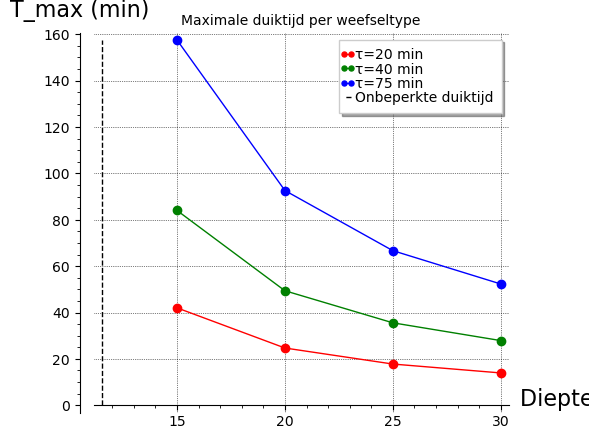

In [15]:
# kleuren per tau
kleuren = ['red', 'green', 'blue']


plots_list = []

for i, tau in enumerate(tau_list):
    T_vals = [resultaten[d][i] for d in dieptes]
    T_vals_plot = [t if t != float('inf') else None for t in T_vals]
    plots_list.append(list_plot(list(zip(dieptes, T_vals_plot)), 
                                marker='o', plotjoined=True, 
                                color=kleuren[i], legend_label=f"τ={tau} min"))

# verticale lijn bij d = 11.5 m (max diepte voor onbeperkte tijd)
verticale_lijn = line([(11.5,0), (11.5, max(max(resultaten[d]) for d in dieptes))], 
                      color='black', linestyle='--', legend_label='Onbeperkte duiktijd')

# combineer alles
show(sum(plots_list) + verticale_lijn, figsize=6, gridlines=True, 
     title="Maximale duiktijd per weefseltype",
     axes_labels=["Diepte (m)", "T_max (min)"], legend_loc='upper right')
